In [1]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 14

In [2]:
pp.InterpolationSettings.tables_path = "/tmp" # save interpolation tables to folder
N_SAMPLES = 100

# Displacement Object
The displacement utility calculates the displacement of a particle between an initial energy $E_i$ and a final energy $E_f$ or vice versa. Displacement and energies are connected by the displacement integral

$$ x_f = x_i - \int_{E_i}^{E_f} \frac{\mathrm{d}E}{f(E)} $$

where $f(E)$ denotes the average continuous loss per grammage.

*When executed for the first time, the following cell will take some time since interpolation tables are built*

In [3]:
args = {
    "particle_def": pp.particle.MuMinusDef(),
    "target": pp.medium.Ice(),
    "interpolate": True,
    "cuts": pp.EnergyCutSettings(np.Infinity, 1, False)
}
cross = pp.crosssection.make_std_crosssection(**args)
disp = pp.make_displacement(cross, False)

## Integrand
The integrand of the displacement utility, which is $\frac{1}{f(E)}$:

Text(0, 0.5, '$f(E)^{-1} \\,/\\, \\left( \\rm{g} \\,/\\, \\rm{MeV} \\cdot \\rm{cm}^2 \\right) $')

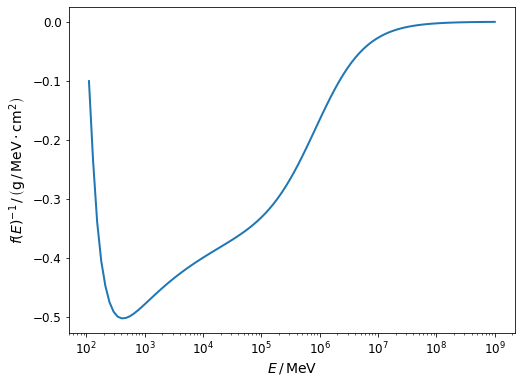

In [4]:
energies = np.geomspace(1.05*args["particle_def"].mass, 1e9, N_SAMPLES)
plt.plot(energies, disp.function_to_integral(energies))
plt.xscale("log")
plt.xlabel(r'$E \,/\, \mathrm{MeV} $')
plt.ylabel(r'$f(E)^{-1} \,/\, \left( \rm{g} \,/\, \rm{MeV} \cdot \rm{cm}^2 \right) $')

## Track Integral
We solve the track integral by setting the upper integral limit to the particle mass and varying the lower integral limit. For each energy, we get the grammage that a particle needs to propagate until it lost all its energy due to continuous losses.

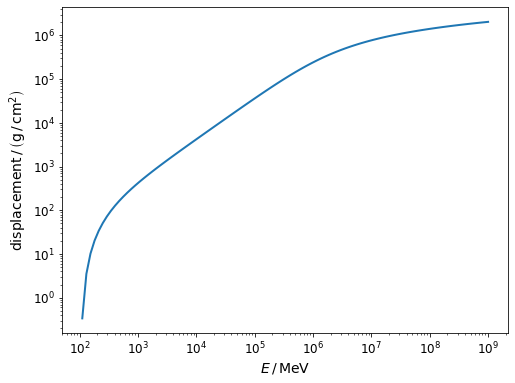

In [5]:
plt.plot(energies, disp.solve_track_integral(energies, args["particle_def"].mass))

plt.xlabel(r'$E \,/\, \mathrm{MeV} $')
plt.ylabel(r'$\mathrm{displacement} \,/\, \left( \rm{g} \,/\, \rm{cm}^2 \right) $')
plt.xscale("log")
plt.yscale("log")

We may also see the displacement integral as an integral equation and solve for $E_f$. In the following plot, we show how much energy is lost, given a fixed initial energy, when propagating a fixed distance.

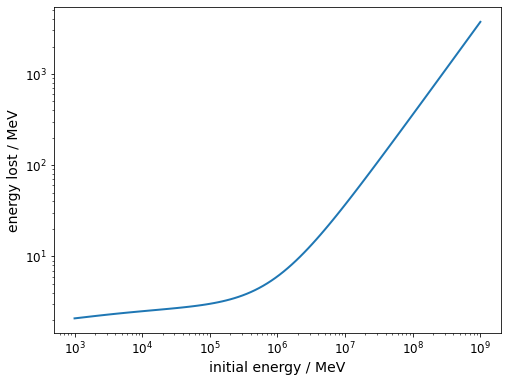

In [6]:
energies = np.geomspace(1e3, 1e9, N_SAMPLES)
distances = 1e0 # 1 g/cm^2 

plt.plot(energies, energies - disp.upper_limit_track_integral(energies, distances))
plt.xlabel("initial energy / MeV")
plt.ylabel("energy lost / MeV")
plt.xscale("log")
plt.yscale("log")

## Examples

### How much energy will a 1 TeV muon lose when it is propagated through 1000 g/cm^2 of ice?

In [7]:
energy = 1e6    # internal unit is MeV
distance = 1e3  # internal unit is g/cm^2

energy_after_distance = disp.upper_limit_track_integral(energy, distance)

print(f"The particle loses {np.round(energy-energy_after_distance,2)} MeV.")

The particle loses 6031.63 MeV.


### How far must a 1 TeV muon propagate to continuously lose half of its initial energy (1 TeV)?

In [8]:
energy = 1e6    # internal unit is MeV
distance = disp.solve_track_integral(energy, 0.5 * energy)

print(f"The particle has to propagate {np.round(distance/100,2)} g/cm^2 to lose half its energy.")

The particle has to propagate 967.61 g/cm^2 to lose half its energy.
